# Derivative of Matrix

## import library

In [71]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

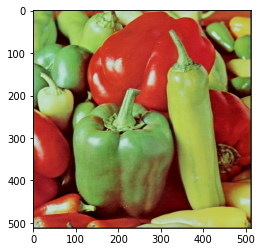

In [72]:
I = img.imread('./pepper.jpg') 
plt.imshow(I)

## check the size of image

In [73]:
n_row = I.shape[0]
n_col = I.shape[1]

print(I.shape)

(512, 512, 3)


## convert the input image into gray scale if it is color

In [74]:
if I.shape[2] == 3: 
    I = np.mean(I,axis=2).astype(np.float32)
    print(I.shape)

(512, 512)


## normalize input image so that the range of image is $[0, 1]$

In [75]:
I = (I - I.min()) / (I.max() - I.min())

```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [65]:
aa=[]
j=0
for j in range(len(I)):
    a=[]
    i=0

    for i in range(len(I[j])-1):
        a.append(I[j][i+1]-I[j][i])
        i += 1
    a.append(0-I[0][len(I[0])-1])
    aa.append(a)
    j+=1
Dx = aa

In [76]:
Dx = np.linalg.inv(I)

LinAlgError: Singular matrix

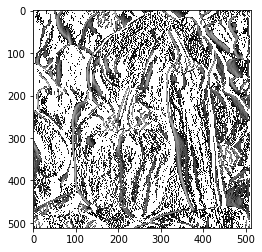

In [67]:
plt.imshow(Dx,cmap='gray',norm=colors.LogNorm())

## compute the derivative of $I$ with respect to $x$-direction

In [30]:
Ix = np.dot(I,Dx)

```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [57]:
aa=[]
j=0
for j in range(len(I)):
    a=[]
    i=0

    for i in range(len(I[j])-1):
        a.append(I[j+1][i]-I[j][i])
        i += 1
        
    a.append(0-I[0][len(I[0])-1])
    aa.append(a)
    j += 1
Dy = aa

IndexError: index 512 is out of bounds for axis 0 with size 512

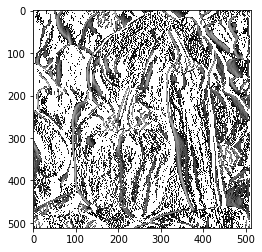

In [46]:
plt.imshow(Dy,cmap='gray',norm=colors.LogNorm())

## compute the derivative of $I$ with respect to $y$-direction

In [32]:
Iy = np.dot(I,Dx)

```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [77]:
norm_gradient = Ix+Iy

## define functions for the visualization

In [34]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow(I,cmap=plt.get_cmap('gray'))
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Ix,cmap='gray',norm=colors.LogNorm())
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy,cmap='gray',norm=colors.LogNorm())
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient,cmap='gray',norm=colors.LogNorm())
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

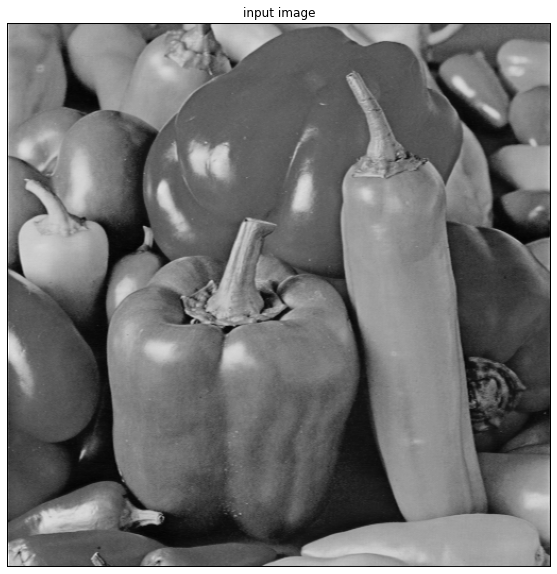

In [35]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

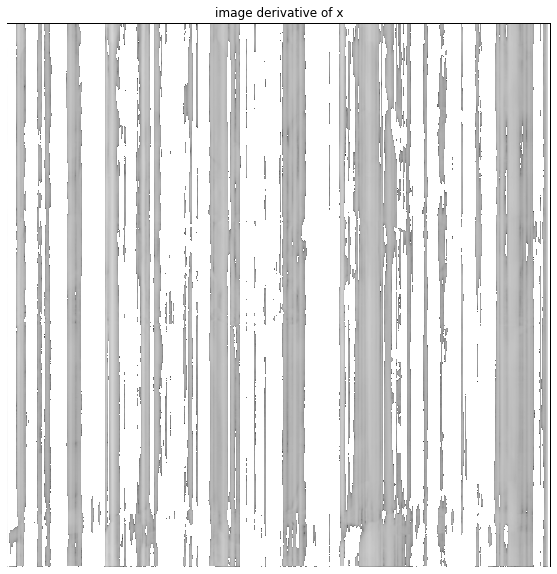

In [36]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

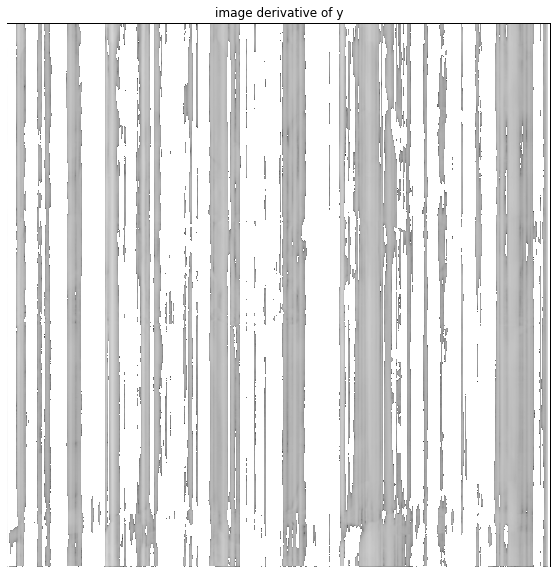

In [37]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

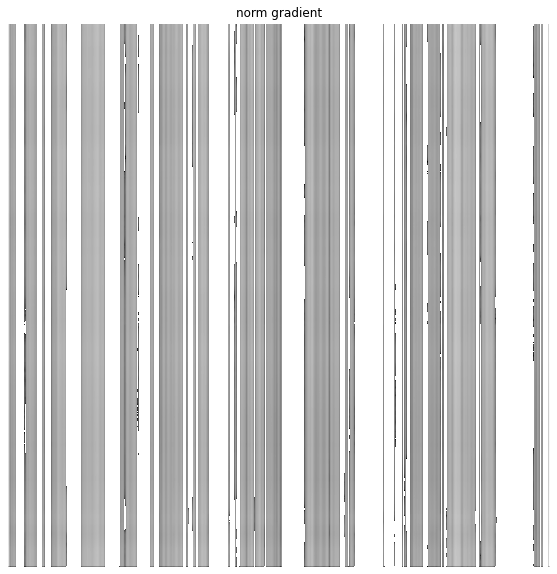

In [38]:
plot_norm_gradient(norm_gradient)